### SECP3223 DATA ANALYTICS PROGRAMMING GROUP PROJECT  
##### SEMESTER 1 2024/2025  
##### SECTION: 01  
##### LECTURER: DR. NOR ERNE NAZIRA BINTI BAZIN  
<br>

##### GROUP MEMBERS:  
##### KOH LI HUI (A22EC0059)  
##### KOH SU XUAN (A22EC0060)  
##### MAISARAH BINTI RIZAL (A22EC0192)  
##### TANG YAN QING (A22EC0109)  
<br>

##### VIDEO LINK:
https://drive.google.com/file/d/15f071iqz_6212lW3pwC5t_gXzqEE7qOW/view?usp=sharing
<br>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Task 3a
#### Find 1 or more suitable dataset(s) which contains enough data to practice data preparation and analysis (at least 1000 rows).

In [8]:
# Step 3a: Generate a suitable dataset to be used in this project
# Load the dataset
file_path = "web_download.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load the "data" sheet
data_sheet = excel_data.parse("data")

# Filter the dataset for the year 2022
data_2022 = data_sheet[data_sheet['DIM_TIME_YEAR'] == 2022]

# Check if the filtered dataset has at least 1,000 rows
if len(data_2022) >= 1000:
    print(f"Filtered dataset for 2022 has {len(data_2022)} rows.")
else:
    print("Filtered dataset for 2022 does not have enough rows.")

# Adjust the "VALUE_STRING" column to one decimal point
# Remove non-numeric characters (e.g., spaces, commas) and convert to float
data_2022.loc[:, 'VALUE_STRING'] = (
    data_2022['VALUE_STRING']
    .str.replace(r'[^\d.-]', '', regex=True)  # Remove non-numeric characters
    .astype(float)
    .round(1)  # Round to one decimal place
)

# Optional: Save the filtered dataset to a new file
data_2022.to_csv("filtered_data_2022.csv", index=False)
print("\nFiltered dataset saved as 'filtered_data_2022.csv'.")
print("Title of the dataset: Global Health Indicators Dataset 2022: Obesity, Tobacco Use, and Malaria Prevalence by Region")
print("It's ready for data preparation and analysis.")

Filtered dataset for 2022 has 4014 rows.

Filtered dataset saved as 'filtered_data_2022.csv'.
Title of the dataset: Global Health Indicators Dataset 2022: Obesity, Tobacco Use, and Malaria Prevalence by Region
It's ready for data preparation and analysis.


### Task 3b
#### Formulate research questions(s) from the dataset. What do you want to analyze?

In [9]:
# Step 3b: Formulate the research question
# Research Question: 
   # Can regions be grouped into clusters based on the prevalence of key health indicators like obesity, tobacco use, and malaria incidence
   # to identify areas with similar health risk profiles?

# Aim:
    # To help policymakers and public health officials identify high-risk regions and allocate resources more effectively.

### Task 3c
#### Do appropriate data cleaning, preparation and wrangling.

This step involves essential data cleaning and transformation tasks to prepare data for analysis. First, the dataset (filtered_data_2022.csv) is reloaded and then filtered to keep only the relevant health indicators: obesity, tobacco use, and malaria incidence. This is achieved by searching for these keywords in the IND_NAME column using a case-insensitive filter. Next, the data is rearranged into a wide format using a pivot table. Each unique combination of region (DIM_GEO_NAME) and year (DIM_TIME_YEAR) forms a row, with health indicators represented as separate columns. This transformation simplifies the structure for further analysis. To ensure data reliability, rows with a significant amount of missing data across the indicator columns are removed. Finally, the values of the health indicators are normalized between 0 and 1 using MinMaxScaler. This step standardizes the indicators, making comparisons between them meaningful and eliminating potential biases caused by varying scales.

In [10]:
# Step 3c: Data Cleaning and Preparation
# Reload the dataset
file_path = 'filtered_data_2022.csv'
data = pd.read_csv(file_path)

# Filter for relevant indicators: obesity, tobacco use, and malaria incidence
relevant_indicators = ["obesity", "tobacco", "malaria"]
filtered_data = data[data["IND_NAME"].str.contains("|".join(relevant_indicators), case=False, na=False)]

# Pivot the data to create one row per region with indicators as columns
pivot_data = filtered_data.pivot_table(
    index=["DIM_GEO_NAME", "DIM_TIME_YEAR"],
    columns="IND_NAME",
    values="VALUE_STRING"
).reset_index()

# Drop rows with significant missing values
cleaned_data = pivot_data.dropna()

# Normalize the data (only the indicator columns)
scaler = MinMaxScaler()
indicator_columns = cleaned_data.columns[2:]
normalized_data = cleaned_data.copy()
normalized_data[indicator_columns] = scaler.fit_transform(cleaned_data[indicator_columns])

### Task 3d
#### Do appropriate data aggregation and group operations.

This step focuses on aggregating the cleaned data and performing group operations. The aggregation is inherently handled during the pivoting process in Task 3c. Thus, multiple observations for the same region and year have been combined into a single row. This ensures that the data are organized and ready for analysis, with each row representing a unique combination of region and year and the corresponding indicator value.

### Task 3e
#### Visualize your analysis using appropriate visualization.

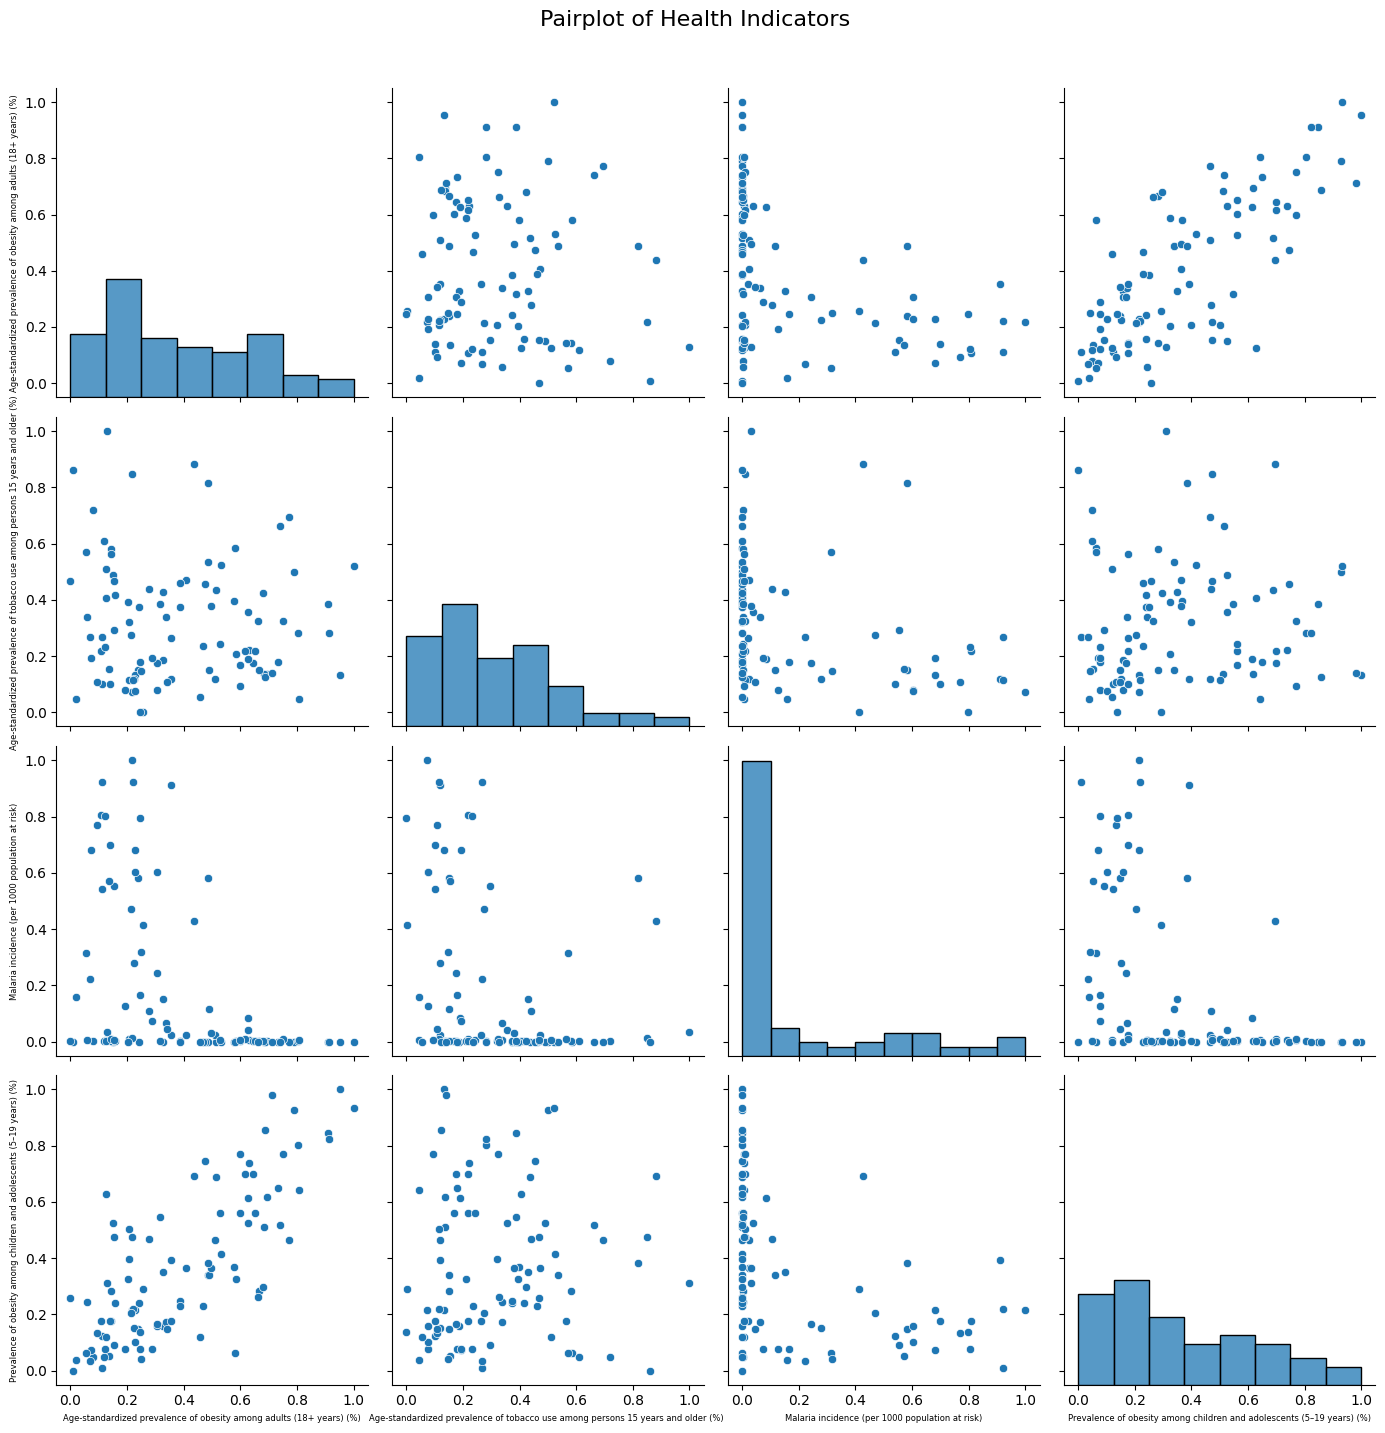

In [11]:
# Step 3e: Visualization of Indicators

### Objective
# The objective of this task is to visualize the relationships between key health indicators—obesity, tobacco use, and malaria incidence—
# using a pairplot. This visualization helps in understanding the distribution and potential correlations between these indicators across 
# different regions.

### Visualization Method
# A pairplot is a grid of scatter plots that shows the relationships between pairs of variables in a dataset. It also includes histograms 
# or kernel density plots along the diagonal to show the distribution of each variable.

# Pairplot to observe relationships between indicators
pairplot = sns.pairplot(normalized_data[indicator_columns], height=3.5)  # Increase the height of each subplot
pairplot.fig.suptitle("Pairplot of Health Indicators", y=1.02, fontsize=16)  # Adjust the title size

# Update font size for axis labels
for ax in pairplot.axes.flatten():
    ax.xaxis.label.set_size(6)  # Set font size for x-axis
    ax.yaxis.label.set_size(6)  # Set font size for y-axis

# Adjust spacing between plots
pairplot.fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing as needed

plt.tight_layout()
plt.show()


### Analysis of Relationships
### Histograms
# Adult Obesity: 
    # The histogram shows a right-skewed distribution, indicating that most regions have lower obesity rates, with a few regions exhibiting higher rates.
# Tobacco Use: 
    # This histogram is also right-skewed, suggesting that while tobacco use is generally low, some regions have significantly higher usage.
# Malaria Incidence: 
    # The histogram is heavily right-skewed, indicating that malaria is prevalent in a few regions but very low in many others.
# Child Obesity: 
    # This histogram shows a right-skewed distribution, suggesting generally low rates with some regions experiencing higher rates.

### Scatter Plots
# Adult Obesity vs. Tobacco Use: 
    # A weak positive correlation is observed, indicating that regions with higher adult obesity rates may also have slightly higher tobacco use, 
    # possibly due to shared lifestyle factors.
# Adult Obesity vs. Malaria Incidence: 
    # No clear correlation is evident, likely due to differing influences—lifestyle factors for obesity and environmental factors for malaria.
# Adult Obesity vs. Child Obesity: 
    # A strong positive correlation is present, suggesting that regions with high adult obesity rates also tend to have high child obesity rates, 
    # indicating shared underlying factors, such as diet or lifestyle, affecting both age groups.
# Tobacco Use vs. Malaria Incidence: 
    # No clear correlation is observed, likely due to tobacco use being lifestyle-related while malaria is environmentally driven.
# Tobacco Use vs. Child Obesity: 
    # A weak positive correlation suggests that regions with higher tobacco use might also have slightly higher child obesity rates.
# Malaria Incidence vs. Child Obesity: 
    # No clear correlation is evident, possibly due to better healthcare and living conditions in regions with higher child obesity, which may 
    # reduce malaria risk.

### Task 3f
#### Visualize your analysis using appropriate visualization.

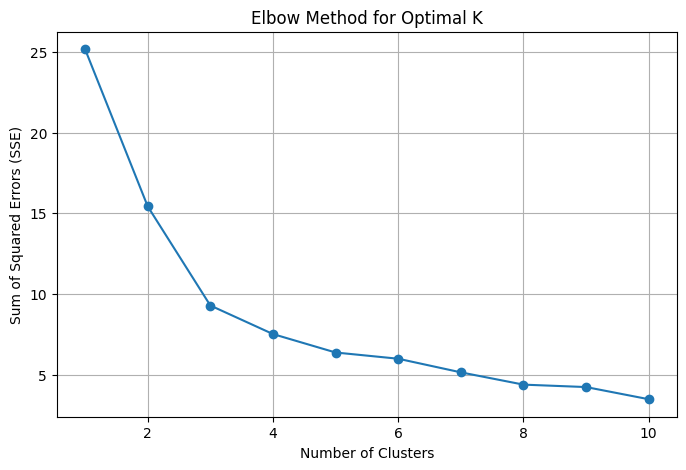

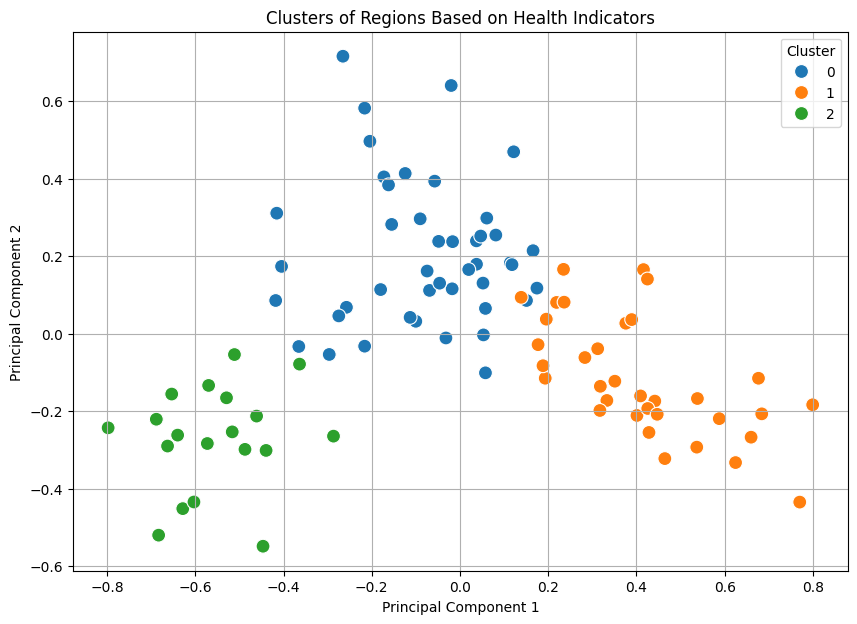

Cluster Summary:
 IND_NAME  Age-standardized prevalence of obesity among adults (18+ years) (%)  \
Cluster                                                                         
0                                                  0.250913                     
1                                                  0.679947                     
2                                                  0.187135                     

IND_NAME  Age-standardized prevalence of tobacco use among persons 15 years and older (%)   \
Cluster                                                                                      
0                                                  0.397368                                  
1                                                  0.304422                                  
2                                                  0.141631                                  

IND_NAME  Malaria incidence (per 1000 population at risk)  \
Cluster                                     

In [12]:
# Step 3f: Apply Machine Learning (Clustering)
# Determine the optimal number of clusters using the elbow method
# Calculate the Sum of Squared Errors (SSE) for different numbers of clusters (k) ranging from 1 to 10.
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data[indicator_columns])
    sse.append(kmeans.inertia_)

# Plot the elbow curve
# Help identify the optimal number of clusters where the SSE drops significantly before leveling off
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 3 based on elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
normalized_data["Cluster"] = kmeans.fit_predict(normalized_data[indicator_columns])

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data[indicator_columns])
normalized_data["PCA1"] = pca_result[:, 0]
normalized_data["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=normalized_data, palette="tab10", s=100
)
plt.title("Clusters of Regions Based on Health Indicators")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Summarize Cluster Characteristics
cluster_summary = normalized_data.groupby("Cluster")[indicator_columns].mean()
print("Cluster Summary:\n", cluster_summary)
##Health Indicators
# Age-standardized prevalence of obesity among adults (18+ years) (%):
    # Cluster 0: Moderate obesity prevalence at 25%.
    # Cluster 1: High obesity prevalence at 68%.
    # Cluster 2: Low obesity prevalence at 19%.
    # This suggests Cluster 1 represents regions with significantly higher adult obesity rates, while Cluster 2 has the lowest rates.

# Age-standardized prevalence of tobacco use among persons 15 years and older (%):
    # Cluster 0: 40% tobacco use.
    # Cluster 1: 30% tobacco use.
    # Cluster 2: 14% tobacco use.
    # Tobacco use is highest in Cluster 0 and much lower in Cluster 2, which might reflect stricter regulations or cultural differences.

# Malaria incidence (per 1000 population at risk):
    # Cluster 0: Low malaria incidence at 0.07.
    # Cluster 1: Very low malaria incidence at 0.02.
    # Cluster 2: High malaria incidence at 0.70.
    # Cluster 2 likely includes regions with endemic malaria, while Clusters 0 and 1 represent areas with better malaria control.

# Prevalence of obesity among children and adolescents (5–19 years) (%):
    # Cluster 0: Moderate childhood obesity at 24%.
    # Cluster 1: High childhood obesity at 64%.
    # Cluster 2: Low childhood obesity at 16%.
    # This mirrors the adult obesity trend, with Cluster 1 showing the highest prevalence and Cluster 2 the lowest.

# Cluster 1: Regions with the highest prevalence of obesity (both adults and children) and lowest malaria incidence, suggesting wealthier, urbanized regions with health challenges related to lifestyle.
# Cluster 2: Regions with low obesity and tobacco use, but high malaria incidence, likely representing poorer, rural regions or areas with tropical diseases.
# Cluster 0: Regions with moderate levels across most indicators, acting as a middle ground between the other two clusters.

# Save the processed data and cluster summary for reporting
normalized_data.to_csv("processed_health_data_with_clusters.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv")

### Conclusion 
This analysis aimed to determine whether regions can be grouped into clusters based on the prevalence of key health indicators—obesity, tobacco use and malaria incidence—to identify areas with similar health risk profiles.

Through data cleaning, preparation, wrangling, aggregation, groupping, normalization and visualization, we explored the relationships between these indicators. The pairplot analysis revealed that while adult and child obesity rates are positively correlated, tobacco use and malaria incidence exhibit weak or no clear relationships. This suggests that different factors influence these health issues, highlighting the complexity of public health dynamics.

Using K-Means clustering, we successfully identified three distinct clusters of regions based on their health profiles. Cluster 1, characterized by high obesity rates and low malaria incidence, likely represents urbanized areas facing lifestyle-related health challenges. Cluster 2, with low obesity and tobacco use but high malaria incidence, indicates regions that may be more rural or affected by environmental factors. Cluster 0 serves as a middle ground, showing moderate levels across the indicators.

These findings confirm that regions can indeed be grouped based on health indicators, providing valuable insights for policymakers and public health officials. By understanding these clusters, stakeholders can better allocate resources and design targeted interventions to address the specific health challenges faced by different regions, ultimately improving health outcomes and resource management.